In [5]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [6]:
import kagglehub
from pathlib import Path

# Download the dataset
path = kagglehub.dataset_download("omniamahmoudsaeed/real-estate-sales-2001-2022")


# Convert string path to Path object
dataset_path = Path(path)

# Load the CSV file
csv_file = dataset_path / "Real_Estate_Sales_2001-2022_GL.csv"
real_estate_sales = pd.read_csv(csv_file)

/tmp/ipython-input-6-3660311823.py:13: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_sales = pd.read_csv(csv_file)


In [7]:
real_estate_sales.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)


In [8]:
real_estate_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [9]:
real_estate_sales["Date Recorded"].value_counts()

,count
Date Recorded,
07/01/2005,877
08/01/2005,859
07/01/2004,840
06/30/2005,828
09/30/2005,781
...,...
04/02/2023,1
02/19/2023,1
05/13/2023,1


In [10]:
real_estate_sales["Town"].value_counts()

,count
Town,
Bridgeport,38158
Stamford,36629
Waterbury,32662
Norwalk,26939
New Haven,23705
...,...
Hartland,512
Canaan,507
Scotland,485


In [11]:
real_estate_sales["Address"].value_counts()

,count
Address,
MULTI ADDRESSES,620
8 SOUTH RD,498
51 OLD SPRINGFIELD RD,204
312 N BISHOP AVE,114
RIGGS ST,106
...,...
MILL POND DR LOT 50,1
30 SCHOOLHOUSE DRIVE UNIT 203,1
18 ANTHONY TERR,1


In [12]:
real_estate_sales["Property Type"].value_counts()

,count
Property Type,
Single Family,401612
Residential,151064
Condo,105420
Two Family,26408
Three Family,12586
Vacant Land,7824
Commercial,5987
Four Family,2150
Apartments,1327


In [13]:
real_estate_sales["Residential Type"].value_counts()

,count
Residential Type,
Single Family,508044
Condo,136822
Two Family,34848
Three Family,16567
Four Family,2959


In [14]:
real_estate_sales["Non Use Code"].value_counts()

,count
Non Use Code,
25 - Other,67062
14 - Foreclosure,54594
07 - Change in Property,40011
08 - Part Interest,17552
01 - Family,14742
...,...
73,1
37,1
34,1


In [15]:
real_estate_sales["Assessor Remarks"].value_counts()

,count
Assessor Remarks,
ESTATE SALE,5663
BELOW MARKET,2574
SHORT SALE,2553
NEW CONSTRUCTION,2430
SALES RATIO,2222
...,...
TEAR DOWN SOLD TO ABUTTER THROUGH DISTRESSED ESTATE SALE,1
LIS PEN FILED - IRS LIENS FILED,1
I09022-113,1


In [16]:
real_estate_sales["OPM remarks"].value_counts()

,count
OPM remarks,
GOOD SALE PER MLS,1200
NO MLS,649
TOTAL RENOVATION PER MLS,563
NEW CONSTRUCTION,453
SHORT SALE PER MLS,355
...,...
FIRST FLOOR TOTAL RENOVATION - SEE PREVIOUS SALE #210345,1
DUPLICATE ENTRY - ALSO SEE #211006,1
RENOVATED - SEE PREVIOUS SALE # 210380,1


In [17]:
real_estate_sales["Location"].value_counts()

,count
Location,
POINT (-72.36336 41.97461),181
POINT (-73.41854 41.13449),145
POINT (-73.45225 41.096),87
POINT (-72.24138701 41.967390991),78
POINT (-73.06359 41.52255),77
...,...
POINT (-73.44725697 41.106274995),1
POINT (-73.004664299 41.645572381),1
POINT (-72.901396003 41.331707999),1


In [18]:
real_estate_sales.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.097629e+06,1.097629e+06,1.097629e+06,1.097629e+06,1.097629e+06
mean,5.370357e+05,2.011218e+03,2.818016e+05,4.053146e+05,9.603926e+00
std,7.526074e+06,6.773485e+00,1.657890e+06,5.143492e+06,1.801664e+03
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.071300e+04,2.005000e+03,8.909000e+04,1.450000e+05,4.778667e-01
50%,8.070600e+04,2.011000e+03,1.405800e+05,2.330000e+05,6.105663e-01
75%,1.703410e+05,2.018000e+03,2.282700e+05,3.750000e+05,7.707200e-01
max,2.000500e+09,2.022000e+03,8.815100e+08,5.000000e+09,1.226420e+06


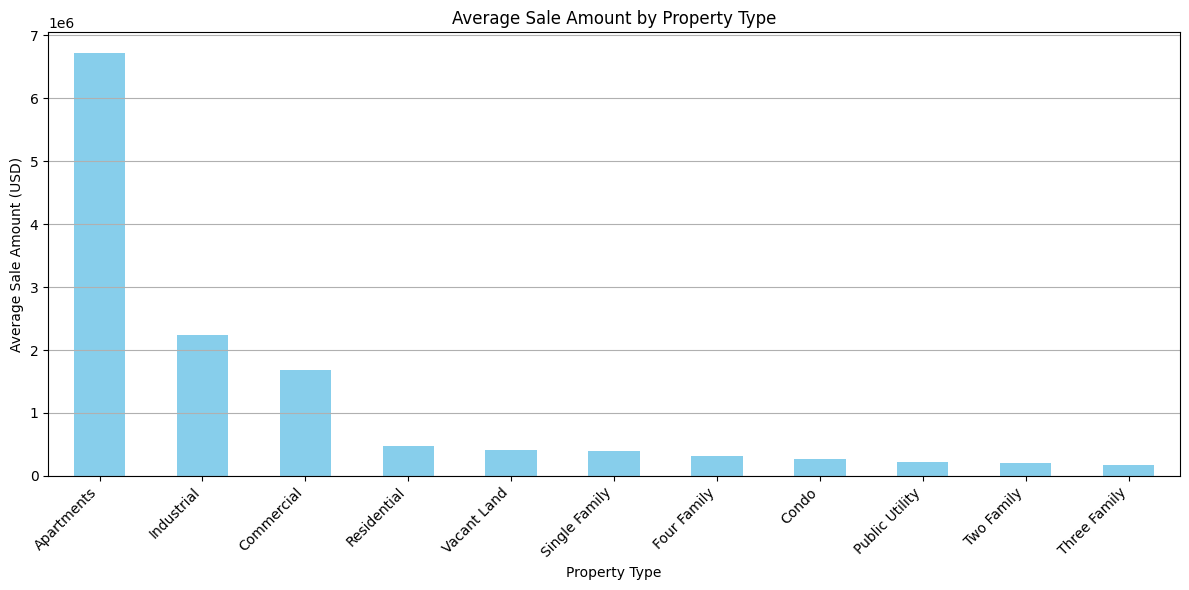

In [32]:
# Filter valid 'Property Type' entries (non-null)
objects_df = real_estate_sales[real_estate_sales["Property Type"].notna()]

# Group by 'Property Type' and calculate mean Sale Amount
avg_sales = objects_df.groupby("Property Type")["Sale Amount"].mean().sort_values(ascending=False)

# Plot as a bar chart
plt.figure(figsize=(12, 6))
avg_sales.plot(kind="bar", color="skyblue")
plt.title("Average Sale Amount by Property Type")
plt.ylabel("Average Sale Amount (USD)")
plt.xlabel("Property Type")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


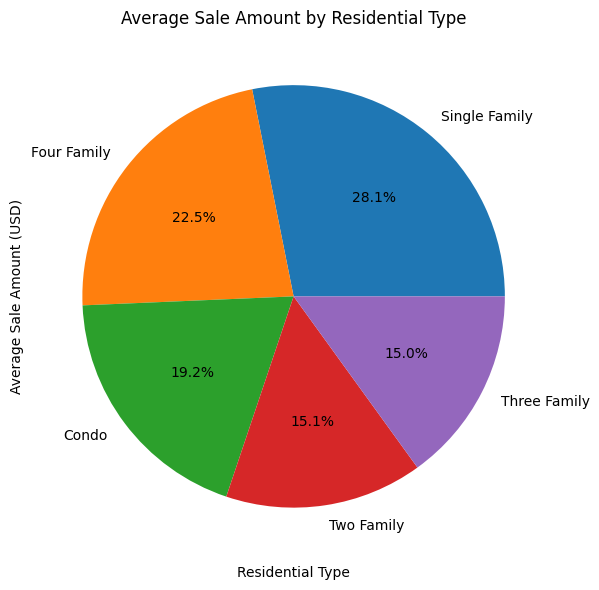

In [30]:
objects_df = real_estate_sales[real_estate_sales["Residential Type"].notna()]

avg_sales = objects_df.groupby("Residential Type")["Sale Amount"].mean().sort_values(ascending=False)

# Plot as a bar chart
plt.figure(figsize=(12, 6))
avg_sales.plot(kind="pie", autopct='%1.1f%%')
plt.title("Average Sale Amount by Residential Type")
plt.ylabel("Average Sale Amount (USD)")
plt.xlabel("Residential Type")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


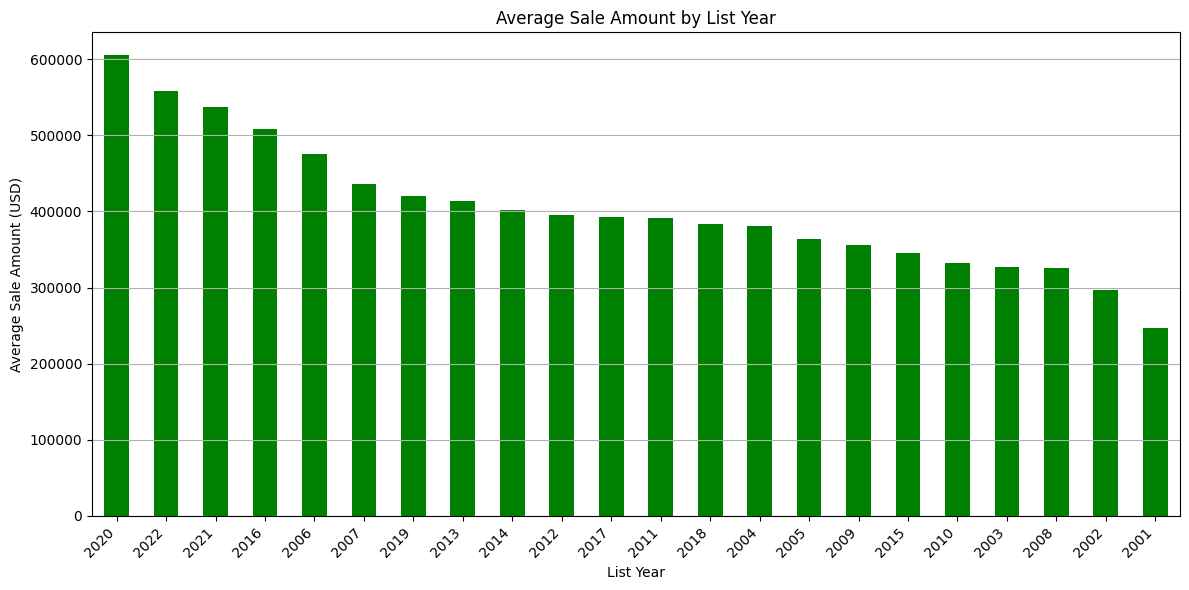

In [55]:
objects_df = real_estate_sales[real_estate_sales["List Year"].notna()]

avg_sales = objects_df.groupby("List Year")["Sale Amount"].mean().sort_values(ascending=False)

# Plot as a bar chart
plt.figure(figsize=(12, 6))
avg_sales.plot(kind="bar", color="green")
plt.title("Average Sale Amount by List Year")
plt.ylabel("Average Sale Amount (USD)")
plt.xlabel("List Year")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()